In [1]:
import pandas as pd

import os.path

from AlgoTrader.core.trader.ATrader import ATrader
from trader.AlphaVantage import AlphaVantage

from trader.Iterator import Iterator

In [2]:
from_symbol = 'EUR'
to_symbol = 'RUB'
file_name = from_symbol + '_' + to_symbol + '.csv'

if not os.path.isfile(file_name):
    client = AlphaVantage()
    df = client.get_forex_daily_dataframe(from_symbol, to_symbol)
    df.to_csv(file_name)
else:
    print('use existed file')

df = pd.read_csv(file_name, index_col=1)
df = df[df.index > '2020-05-24']
df.sort_index(inplace=True)

use existed file


<AxesSubplot:xlabel='timestamp'>

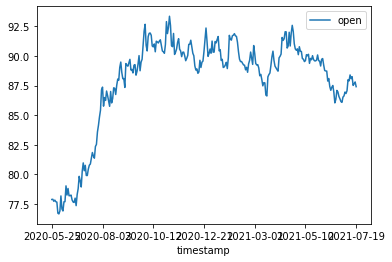

In [3]:
df.head(10)
df.plot(y=['open'])

In [4]:
df

,Unnamed: 0,open,high,low,close
timestamp,,,,,
2020-05-25,300,77.8920,78.3415,77.4040,77.9663
2020-05-26,299,77.9074,78.1370,77.4080,77.6259
2020-05-27,298,77.7370,78.4951,77.3557,77.8090
2020-05-28,297,77.8370,78.3787,77.6789,77.6850
2020-05-29,296,77.7020,78.7307,77.6830,77.9290
...,...,...,...,...,...
2021-07-13,4,88.2540,88.2880,87.3590,87.5187
2021-07-14,3,87.5150,87.8247,87.2428,87.6482
2021-07-15,2,87.6482,88.0460,87.4309,87.8069


<Figure size 800x800 with 0 Axes>

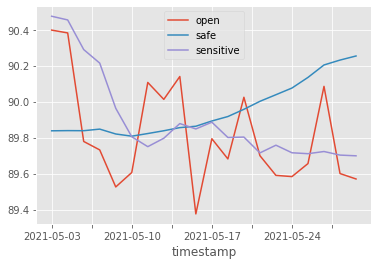

In [5]:
trader = ATrader(df.copy())
trader.analyze(5, 50, 0.01)
trader.trade(2000, 50)

trader.plot_with_sma(
    from_datetime='2021-05-01',
    to_datetime='2021-05-30'
)

In [6]:
trader.report()

,datetime,price,stocks_count,portfolio,volume,benefit,%,action
0,2020-11-19,89.9430,11.118153,1000.300000,999.700000,0.000000,-50.0,buy
1,2020-12-23,92.3580,11.118153,2027.458394,1027.158394,27.458394,1.4,sell
2,2020-12-30,90.2330,11.234573,1014.033316,1013.425078,0.000000,-49.3,buy
3,2021-01-05,91.2220,11.234573,2039.180957,1025.147641,11.722563,2.0,sell
4,2021-01-15,89.0260,11.452727,1019.896356,1019.284601,0.000000,-49.0,buy
5,2021-01-26,91.4123,11.452727,2067.130553,1047.234197,27.949596,3.4,sell
6,2021-02-10,89.5330,11.543959,1033.875346,1033.255207,0.000000,-48.3,buy
7,2021-03-26,89.6200,11.543959,2068.755317,1034.879972,1.624765,3.4,sell
8,2021-03-31,88.8478,11.642130,1034.687972,1034.067345,0.000000,-48.3,buy
9,2021-04-06,90.1582,11.642130,2084.636368,1049.948396,15.881051,4.2,sell


In [7]:
trader.final_benefit


63.32693795980913